In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy.stats import norm
from scipy import stats
import seaborn as sns

# Investigating 2021 Housing Prices (Part 1)

## Introduction:

In the United States, the housing market is a significant component of the economy, influencing household wealth, consumer spending, and employment. Historically, periods of rapid growth in housing prices have been associated with economic expansion, while declines in prices have signaled downturns. Therefore, monitoring housing prices is essential for policymakers, investors, and consumers alike to gauge the health of the economy and make informed decisions.

Housing in Berkeley, California has been of hot discussion for decades. Berkeley's swelling housing prices demonstrate the historical impact of the economy on housing: [housing prices exploded as the Bay Area’s tech-fueled economy roared back from the Great Recession](https://www.berkeleyside.org/2023/10/23/berkeley-affordable-housing-construction).

[Inflation](https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/) can have both positive and negative impacts on the housing market. While moderate inflation may stimulate asset appreciation and reduce mortgage debt burdens, high inflation rates can lead to affordability challenges and speculative behavior. Achieving a balance between inflationary pressures and market stability is crucial for fostering a healthy housing market that promotes sustainable growth and equitable access to homeownership.

Thinking critically about the data and findings that underlie policymaking is essential. Transparency in policymaking fosters accountability. By scrutinizing the data behind policies, researchers, advocates, and citizens can hold decision-makers accountable for their choices and advocate for evidence-based interventions that benefit society as a whole.

In this assignment, you will analyze a dataset to assess the potential impact of investments in various sectors on the economy of US cities, particularly focusing on whether specific investments could lead to increased housing prices. As a data scientist hired by a policymaker, your objective is to provide evidence either supporting or challenging the assertions regarding the economic benefits associated with these investments.

In [3]:
# Let's read in the data.
file_path = '/Users/mirandashen/Desktop/school_docs/urap/Villas-Boas_2023pset3.dta'
df = pd.read_stata(file_path)

You will be using the dataset ‘df’ to analyze some of the variables you assessed above to determine where the policymaker should focus their proposals. The dataset contains characteristics for 98 US cities from 2019 to 2021. You will investigate the following variables:


| Variable      | Definition                                           | Source             |
|---------------|------------------------------------------------------|--------------------|
| city          | City name                                            |                    |
| state         | State name                                           |                    |
| pricesept2021 | One bedroom housing price, in USD                   | www.Zumper.com     |
| successteams  | Dummy variable =1 if at least one NBA, NFL, or MLB team in a city had a winning record last season (2020 season), =0 otherwise | Google search |
| violentcrime2019 | Violent crimes (in thousands)                      | FBI                |
| numberbars    | Number of bars, count                               | www.yellowpages.com|
| aqi2020       | Annual 2020 air quality index (AQI)                 | EPA                |
| gdp           | Gross domestic product (billion $)                  | BEA                |
| popuul2019    | 2019 population (in thousands of people)            | FBI                |
| nteams        | Number of major professional sports teams           | Google search      |


### Question 1:

Based on the provided list of variables, which factors do you predict would have the largest impact on one-bedroom housing prices in September 2021, and which ones do you expect to have the smallest impact? Please list them in order of largest to smallest impact.

- The number of wins held by an NBA, NFL, or MLB team in the 2020 season
- The number of violent crimes in 2019
- The number of bars in 2021
- The air quality index (AQI) in 2020
- The gross domestic product (GDP) in 2021
- The population in 2019
- The number of major professional sports teams 
- The average household size in 2020
- The number of restaurants in 2021
- The average household salary in 2020
- The number of national parks in 2021

##### Type answer here.

## Sports Teams

The policymaker is a huge fan of sports, and they hypothesize that the cities with at least one sports team win in the 2020 season have higher housing prices than cities without a sports team win in the 2020 season.

Run the following cell to group the dataset by the success of sports teams in each city and plot histograms of one-bedroom housing prices for cities with successful and unsuccessful sports teams. The x-axis represents housing prices in USD, and the y-axis represents frequency.

In [4]:
# Group the dataset by 'successteams'
grouped_data = df.groupby('successteams')

### Question 2

Plot an overlaid histogram of the distribution of housing prices for cities with successful sports teams and unsuccessful sports teams, respectively.

Feel free to explore matplotlib.pyplot at: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html.

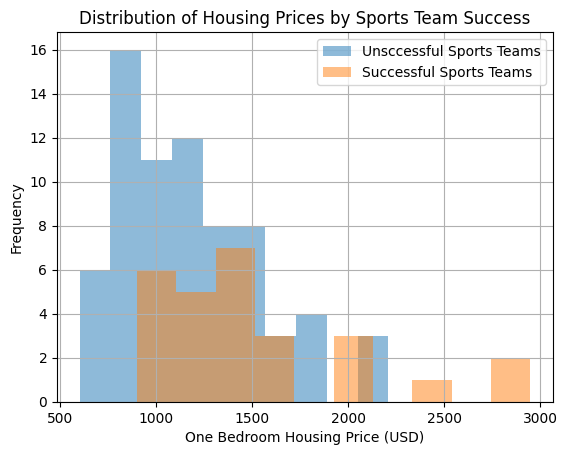

In [5]:
# Type code here:

# SOLUTION:

grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Unsccessful Sports Teams', 'Successful Sports Teams'])
plt.title('Distribution of Housing Prices by Sports Team Success')
plt.show()

### Question 2:

What do you notice about the housing prices for cities with a successful sports team versus cities without a successful sports team?

##### Type answer here.

Interesting! Let's dig a bit deeper and see how much having a successful sports team in a given city actually impacts the city's housing prices. We want to conduct the following steps in order to analyze the effect size of sports teams' success on housing prices:

1. Start by creating two variables: one for housing prices of cities with no sports teams, and another for housing prices of cities with sports teams. Both of these variables should be Series data.
   
2. Fit [Gaussian distributions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) (hint: use norm.fit(*Series data*)) to each group of housing prices. Calculate the mean (mu_delta) and standard deviation (std_delta) of the each of these distributions.

3. Generate 1,000 random samples from the Gaussian distributions fitted to each group in Step 2. These samples represent hypothetical housing price data based on the distributions observed in the actual data.

4. Calculate the difference between the random samples generated for successful sports teams and unsuccessful sports teams. These differences, or deltas, represent the potential impact of sports team success on housing prices.

5. Fit a Gaussian distribution to the deltas. Calculate the mean (mu_delta) and standard deviation (std_delta) of the deltas distribution. This step helps quantify the average difference in housing prices between cities with successful and unsuccessful sports teams.

6. Calculate the probability that, for any given house, the price increases when the sports team is successful. This probability is derived from the Gaussian distribution of the deltas, indicating the likelihood of observing an increase in housing prices associated with sports team success. Hint: use the function [norm.cdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to calculate the area to the left of a given datapoint. If we want the area to the right of that same datapoint, what arithmetic can we conduct?

7. Print out the calculated probability and mean of the deltas.

If you find this tricky, feel free to use ChatGPT and/or the provided solutions. These coding concepts won't be tested, but they will give a better intuitive understanding of effect size and they ways in which it can be calculated.

In [6]:
# Type code here:

# SOLUTION

# Select data for successteams = 0 and successteams = 1
no_success = df[df['successteams'] == 0]['pricesept2021']
success = df[df['successteams'] == 1]['pricesept2021']

# Fit Gaussian to data
no_mu, no_std = norm.fit(no_success)
succ_mu, succ_std = norm.fit(success)
    
# Generate random samples from the Gaussian distributions
no_samples = np.random.normal(no_mu, no_std, 1000)
succ_samples = np.random.normal(succ_mu, succ_std, 1000)
    
# Subtract the two arrays to get deltas
deltas = succ_samples - no_samples
    
# Fit Gaussian to the delta
mu_delta, std_delta = norm.fit(deltas)
    
# Calculate probability that for any given house the price increases
probability = 1 - norm.cdf(0, mu_delta, std_delta)
    
# Print probabilities and means
print(f"Probability: {probability}, Mean: {mu_delta}")

Probability: 0.713116459668263, Mean: 370.9608948513938


In [7]:
# Generate data points for plotting the fitted Gaussian distribution
x = np.linspace(mu_delta - 3*std_delta, mu_delta + 3*std_delta, 1000)
pdf = norm.pdf(x, mu_delta, std_delta)

### Question 3:

Plot the fitted Gaussian distribution from the variables **x** and **pdf**, created above. Remember to include labeling for the x and y axes, a title for the plot, and a legend for clarity. 

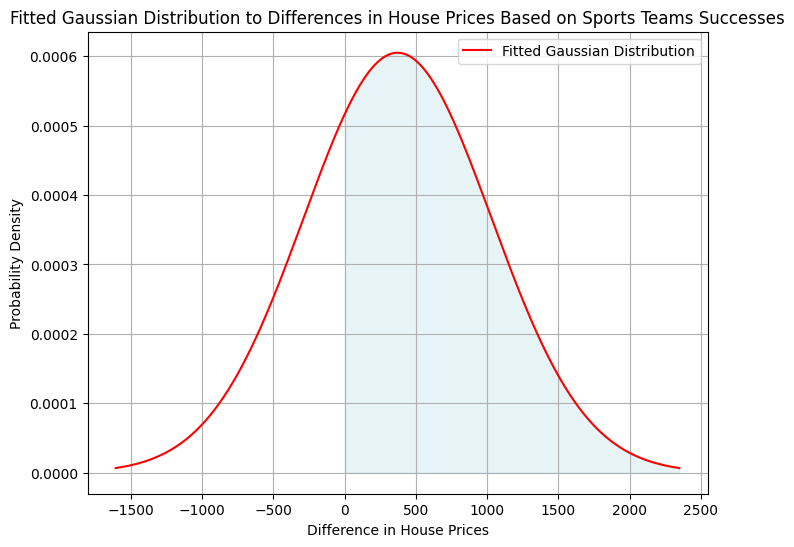

In [8]:
# Type code here:

# Don't change the code below:

plt.fill_between(x, pdf, where=(x >= 0), color='lightblue', alpha=0.3)  # Shade the area from 0 onwards

# SOLUTION

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices Based on Sports Teams Successes')
plt.fill_between(x, pdf, where=(x >= 0), color='lightblue', alpha=0.3)  # Shade the area from 0 onwards
plt.grid(True)
plt.legend()
plt.show()

### Question 4:

What do the variables **probability** and **mean** represent? How can the policymaker use them to gauge the importance of sports teams wins in changing housing prices?

##### Type answer here.

Excited by the these findings, the policymaker wastes no time in planning on drafting key proposals aimed at leveraging the success of sports teams to drive economic growth.

### Question 5:

Draft a proposal for the policymaker to present to the mayor. Feel free to run some exploratory data analyses on the dataset to support your answer.

##### Type answer here.

In [86]:
# OPTIONAL: Feel free to add code here.

The policymaker presents the proposed policy to the mayor, expecting approval, but the mayor is skeptical. "Is the most important thing we should be focusing on...sports?" the mayor questions.


The calculated *probability* and *mean* hold significant importance in understanding the effect size of the relationship between the success of sports teams in a given city and that city's housing prices. 

The probability represents the likelihood that housing prices will increase for any given house when the condition associated with successful teams is present. A higher probability suggests a stronger effect, indicating a greater likelihood of observing an increase in housing prices when teams are successful. 

Additionally, the mean offers a quantitative measure of the average difference in housing prices between successful and unsuccessful teams. A larger mean delta indicates a more substantial effect size, suggesting a greater increase in housing prices associated with successful teams compared to unsuccessful ones. 

Together, these metrics help quantify the effect size of the relationship between team success and housing prices. 

However, the mayor has a valid point. Food for thought: are we investigating correlation or causation? Can we make an informed decision from these calculations? More on this next time!

# Investigating 2021 Housing Prices (Part 2)

In Part 1,  we explored the role of the housing market in the economy and the impact of inflation, focusing on the effect of sports teams' success on housing prices. We used a dataset containing characteristics for 98 US cities from 2019 to 2021 to determine where a policymaker should focus their proposals. Specifically, we investigated the impact of sports teams' success on housing prices and found the mean of the deltas to be ~370 and the probability of any given housing price increasing as a result of sports teams' success to be ~70% (these variables might fluctuate due to the random sampling procedure).

Now, we'll expand this analysis to four more variables: air quality index (AQI), gross domestic product (GDP), and number of violent crimes. 

In [9]:
# Let's read in the data.
file_path = '/Users/mirandashen/Desktop/school_docs/urap/Villas-Boas_2023pset3.dta'
df = pd.read_stata(file_path)

## Air Quality Index (AQI)

Let's start of by assessing air quality index (AQI) of the 98 cities in 2020. Run the cells below to visualize the AQI and binarize the variable. Then, calculate the relative increase in housing prices again, this time for a random sample of 1,000 AQI datapoints.

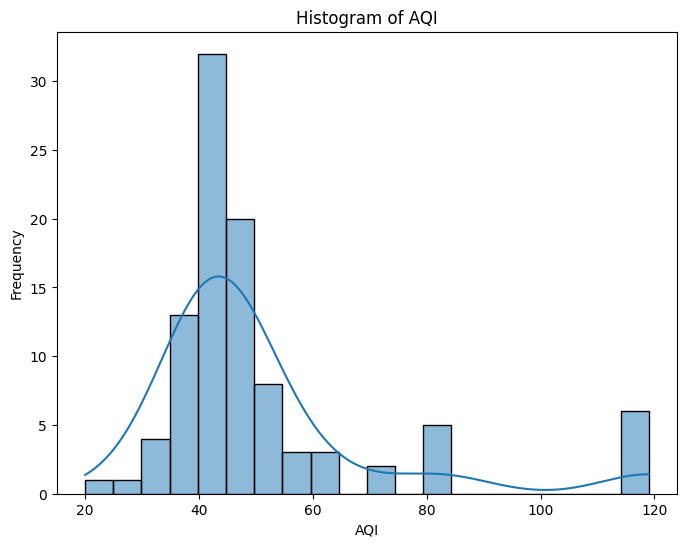

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df['aqi2020'], bins=20, kde=True)
plt.title('Histogram of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

The AQI is divided into six categories and ranges from 0 to 500. Each category corresponds to a different level of health concern. Moderate air quality ranges from 51 to 100. Based on this data, let's classify an AQI less than 50 to be "good air" and an AQI greater than or equal to 50 to be "bad air".

Run the cells before to binarize the AQI variable and re-calculate its probability of increasing housing prices and respective mean.

In [49]:
# Binarize AQI variable
df['aqi2020_binarized'] = (df['aqi2020'] >= 50).astype(int)

In [50]:
# Group the dataset by 'aqi2020_binarized'
aqi_grouped_data = df.groupby('aqi2020_binarized')

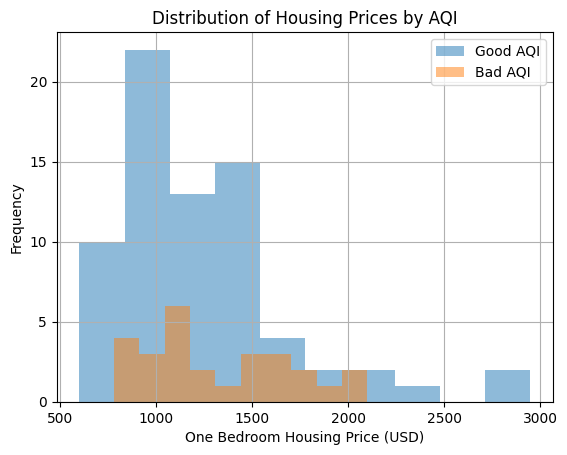

In [51]:
aqi_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Good AQI', 'Bad AQI'])
plt.title('Distribution of Housing Prices by AQI')
plt.show()

In [52]:
# Select data for aqi2020_binarized = 0 and aqi2020_binarized = 1
bad_aqi = df[df['aqi2020_binarized'] == 0]['pricesept2021']
good_aqi = df[df['aqi2020_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
bad_mu, bad_std = norm.fit(bad_aqi)
good_mu, good_std = norm.fit(good_aqi)
    
# Generate random samples from the Gaussian distributions
bad_samples = np.random.normal(bad_mu, bad_std, 1000)
good_samples = np.random.normal(good_mu, good_std, 1000)
    
# Subtract the two arrays to get deltas
aqi_deltas = good_samples - bad_samples
    
# Fit Gaussian to the delta
aqi_mu_delta, aqi_std_delta = norm.fit(aqi_deltas)
    
# Calculate probability that for any given house the price increases
aqi_probability = 1 - norm.cdf(0, aqi_mu_delta, aqi_std_delta)
    
# Print probabilities and means
print(f"Probability: {aqi_probability}, Mean: {aqi_mu_delta}")

Probability: 0.5562762362574708, Mean: 85.94474698696101


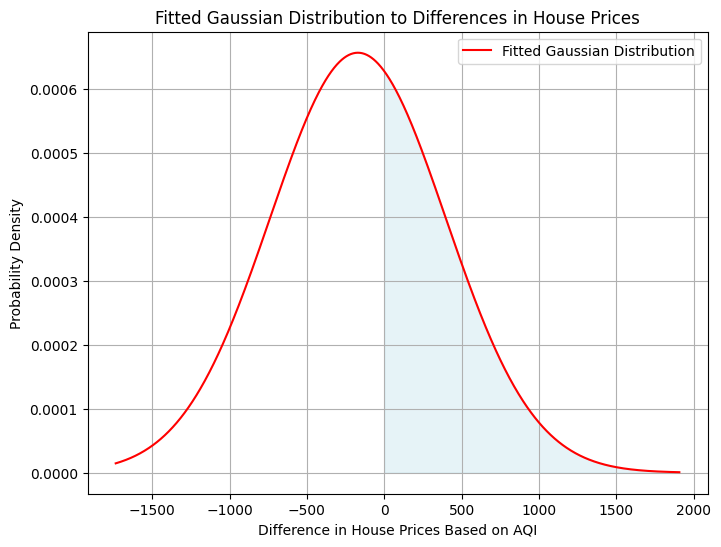

In [53]:
# Generate data points for plotting the fitted Gaussian distribution
aqi_x = np.linspace(aqi_mu_delta - 3*aqi_std_delta, aqi_mu_delta + 3*aqi_std_delta, 1000)
aqi_pdf = norm.pdf(x, aqi_mu_delta, aqi_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(aqi_x, aqi_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on AQI')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(aqi_x, aqi_pdf, where=(aqi_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

Before choosing which sector to focus on, the policymaker wants to fully analyze the data we have. 

Let's run even more tests to investigate some additional variables.

## Gross Domestic Product (GDP)

Run the cells below to repeat the steps above, this time for GDP.

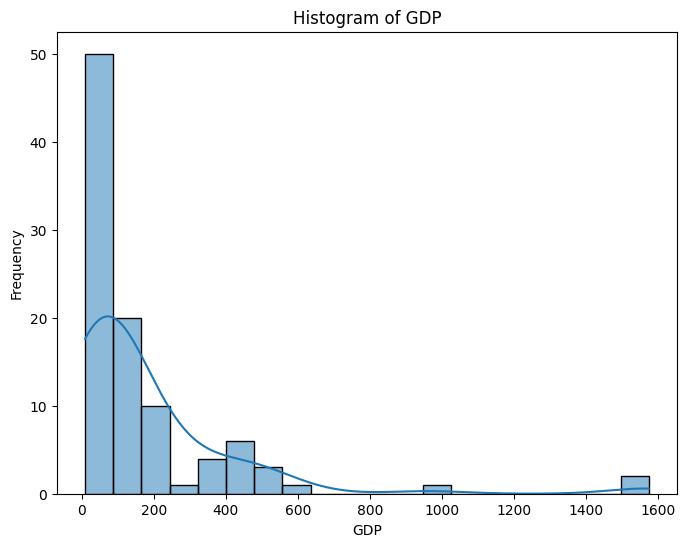

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df['gdp'], bins=20, kde=True)
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

In [55]:
# Binarize GDP
df['gdp_binarized'] = (df['gdp'] >= 300).astype(int)

In [56]:
# Group the dataset by 'gdp_binarized'
gdp_grouped_data = df.groupby('gdp_binarized')

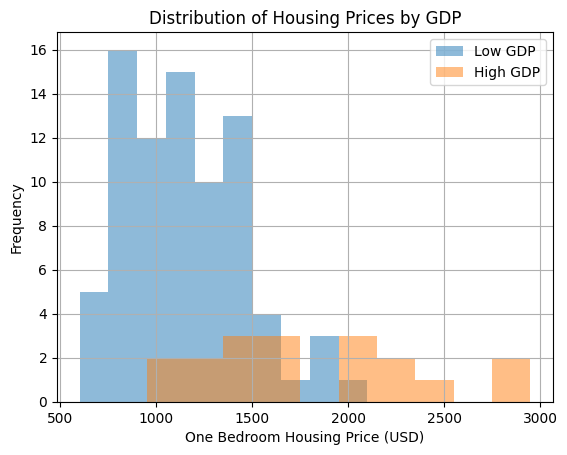

In [57]:
gdp_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Low GDP', 'High GDP'])
plt.title('Distribution of Housing Prices by GDP')
plt.show()

In [58]:
# Select data for gdp_binarized = 0 and gdp_binarized = 1
low_gdp = df[df['gdp_binarized'] == 0]['pricesept2021']
high_gdp = df[df['gdp_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
low_gdp_mu, low_gdp_std = norm.fit(low_gdp)
high_gdp_mu, high_gdp_std = norm.fit(high_gdp)

# Generate random samples from the Gaussian distributions
low_gdp_samples = np.random.normal(low_gdp_mu, low_gdp_std, 1000)
high_gdp_samples = np.random.normal(high_gdp_mu, high_gdp_std, 1000)

# Subtract the two arrays to get deltas
gdp_deltas = high_gdp_samples - low_gdp_samples

# Fit Gaussian to the delta
gdp_mu_delta, gdp_std_delta = norm.fit(gdp_deltas)

# Calculate probability that for any given house the price increases
gdp_probability = 1 - norm.cdf(0, gdp_mu_delta, gdp_std_delta)

# Print probabilities and means
print(f"Probability: {gdp_probability}, Mean: {gdp_mu_delta}")

Probability: 0.8391756655970773, Mean: 618.0302049365325


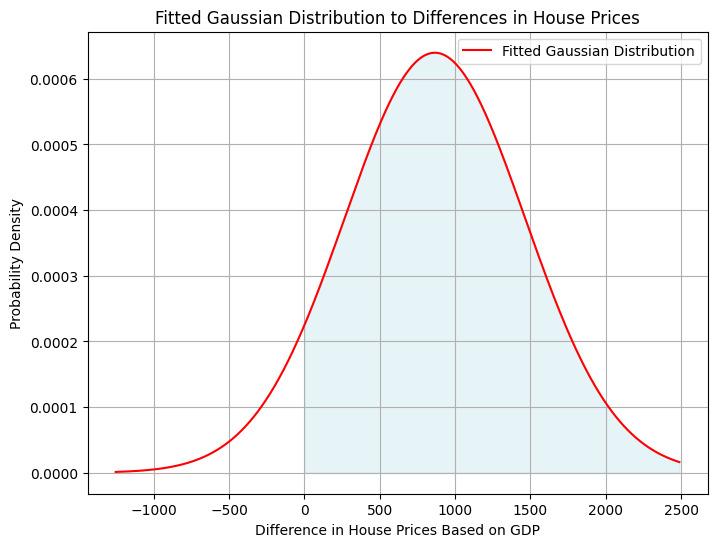

In [59]:
# Generate data points for plotting the fitted Gaussian distribution
gdp_x = np.linspace(gdp_mu_delta - 3*gdp_std_delta, gdp_mu_delta + 3*gdp_std_delta, 1000)
gdp_pdf = norm.pdf(x, gdp_mu_delta, gdp_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(gdp_x, gdp_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on GDP')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(gdp_x, gdp_pdf, where=(gdp_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

## Violent Crimes

Run the cells below to repeat the steps above, this time for violent crimes.

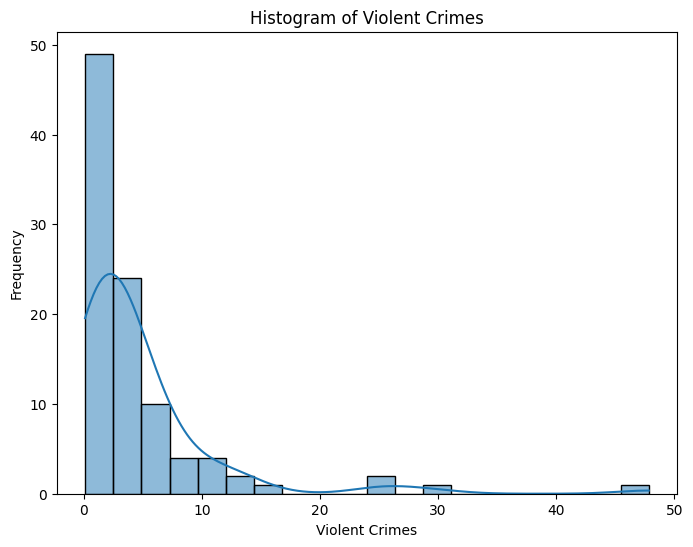

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['violentcrime2019'], bins=20, kde=True)
plt.title('Histogram of Violent Crimes')
plt.xlabel('Violent Crimes')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Calculate the median of violentcrime2019
median_violentcrime = df['violentcrime2019'].median()

# Binarize GDP based on the median threshold
df['crime_binarized'] = (df['violentcrime2019'] >= median_violentcrime).astype(int)

In [62]:
# Group the dataset by 'crime_binarized'
crime_grouped_data = df.groupby('crime_binarized')

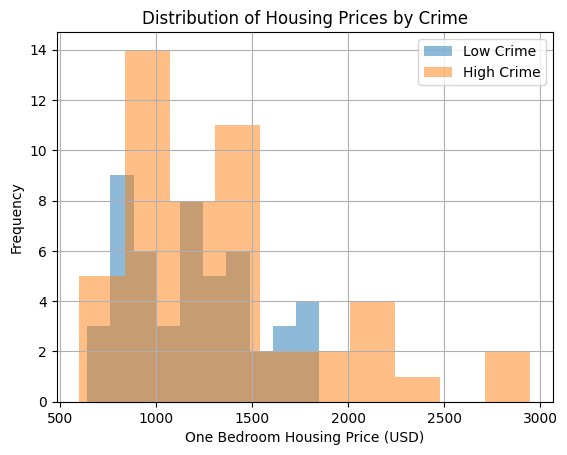

In [63]:
crime_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Low Crime', 'High Crime'])
plt.title('Distribution of Housing Prices by Crime')
plt.show()

In [64]:
# Select data for crime_binarized = 0 and crime_binarized = 1
low_crime = df[df['crime_binarized'] == 0]['pricesept2021']
high_crime = df[df['crime_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
low_crime_mu, low_crime_std = norm.fit(low_crime)
high_crime_mu, high_crime_std = norm.fit(high_crime)

# Generate random samples from the Gaussian distributions
low_crime_samples = np.random.normal(low_crime_mu, low_crime_std, 1000)
high_crime_samples = np.random.normal(high_crime_mu, high_crime_std, 1000)

# Subtract the two arrays to get deltas
crime_deltas = high_crime_samples - low_crime_samples

# Fit Gaussian to the delta
crime_mu_delta, crime_std_delta = norm.fit(crime_deltas)

# Calculate probability that for any given house the price increases
crime_probability = 1 - norm.cdf(0, crime_mu_delta, crime_std_delta)

# Print probabilities and means
print(f"Probability: {crime_probability}, Mean: {crime_mu_delta}")

Probability: 0.600760848281187, Mean: 158.17633694979978


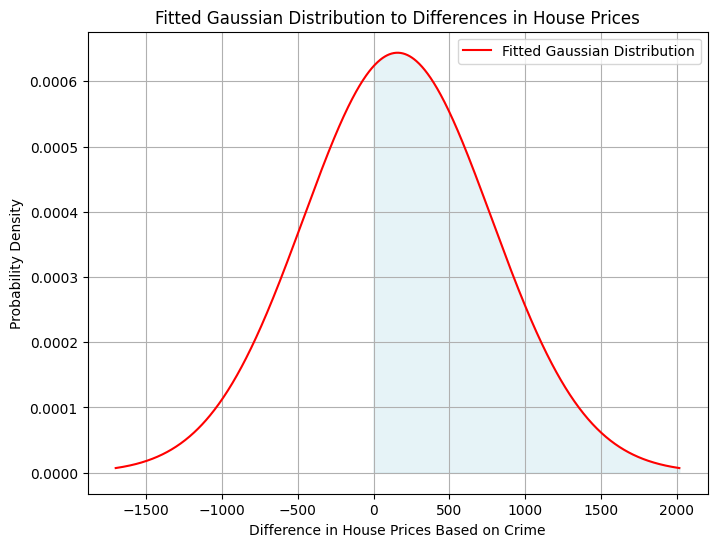

In [65]:
# Generate data points for plotting the fitted Gaussian distribution
crime_x = np.linspace(crime_mu_delta - 3*crime_std_delta, crime_mu_delta + 3*crime_std_delta, 1000)
crime_pdf = norm.pdf(crime_x, crime_mu_delta, crime_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(crime_x, crime_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on Crime')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(crime_x, crime_pdf, where=(crime_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

### Question 6:

Compare and contrast the results of each variable's probability and mean values. Fill in all the columns of the table below.

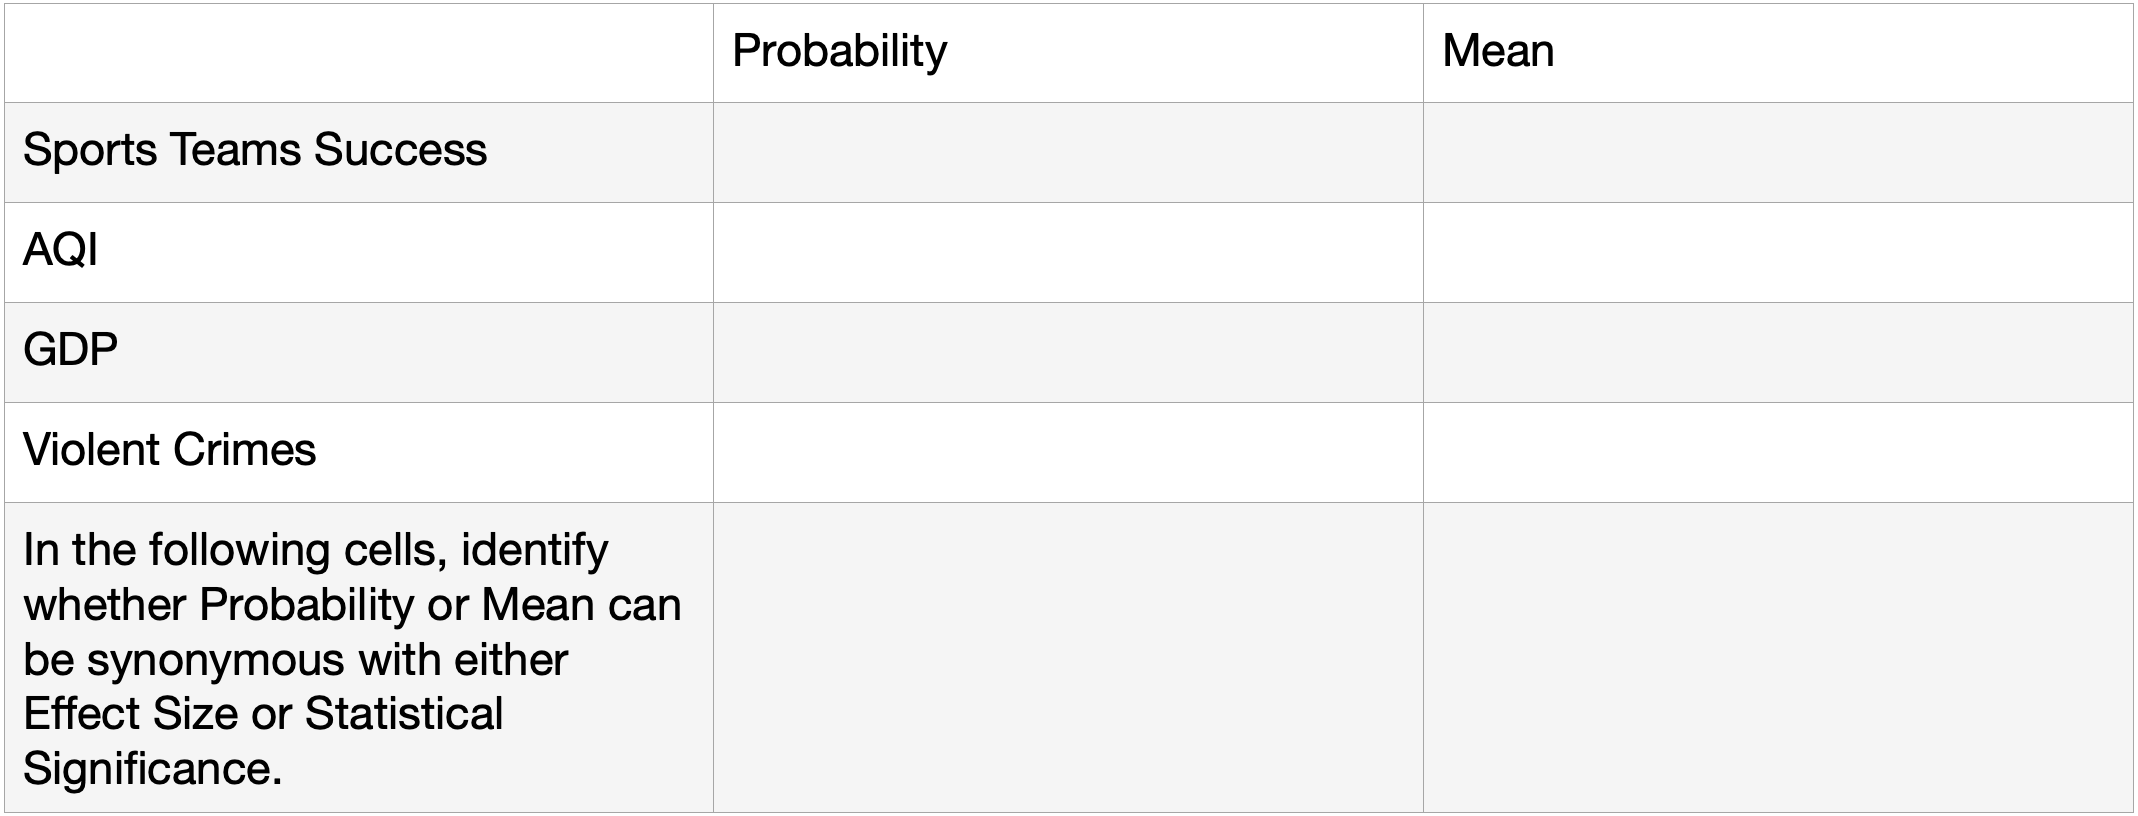

Reminder: the probability represents the increase is housing prices for 1) having at least one winning sports team, 2) having "good" AQI, 3) having "high" GDP, 4) having "high crime" in a given city.

##### Write answer here.

### Question 7:

Based on your answer to Question 5, the policymaker wants to draft a brief policy that should be proposed to the mayor. Choose the most important variable and draft a brief policy that should be proposed to the mayor.

##### Write answer here.

The policymaker takes your drafted policy to the mayor. While impressed by the analyses, the mayor sighs and expresses that he still can't make a decision based on the data. Why?

## Correlation versus Causation

The values we calculated in this module are measures of association, not causation. Making policy decisions based solely on correlation without considering potential confounding variables or underlying mechanisms can lead to ineffective or harmful interventions.

## Discussion Questions

1. Can you recall a situation where you or others narrowed our focus to the point of missing out on key data in an analysis? How did this affect our decision-making process?

2. Explain how recognizing multiple variables of importance, such as housing prices, air quality, and crime rates, contributes to our understanding of the relationship between sports team success and housing prices.